[[0.41928025 0.96829453 0.83281682 0.38008307 0.21365617 0.8204161
  0.22837328 0.89282812 0.40096092 0.91099127 0.00212836 0.77620757
  0.27672881 0.72135811 0.37348629 0.28988376]]
[[0.9046119  0.63112772 0.350827   0.06846573 0.68947064 0.55798516
  0.20788858 0.90012793 0.99833069 0.31371473 0.3887527  0.34728763
  0.60504398 0.96139845 0.84352375 0.54968118]]


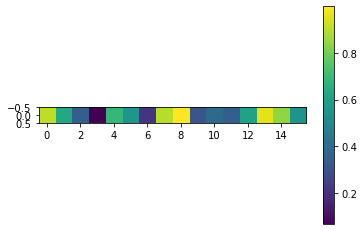

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

a = np.random.random((1,16))
b = np.random.random((1,16))
print(a)
print(b)
#fig, axs = plt.subplots(2)
plt.imshow(a, cmap='viridis', interpolation='nearest')
#ax = sns.heatmap(a, linewidth=0.5)
plt.imshow(b, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.show()

In [7]:
import torch.nn.functional as F
import torch.nn as nn
from torch import abs
import torch


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # conv2d(input_channels, output_channels, kernel_size)
        self.dropout1 = nn.Dropout(0.5)
        # self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(1024 * 1, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 32)
        self.fcOut = nn.Linear(32, 1)
        # self.sigmoid = nn.Sigmoid()
        #self.tanh = nn.Tanh()

    def forward_once(self, x):
        # x = self.dropout1(F.relu(self.fc1(x)))
        x = F.relu(self.fc1(x))
        x = self.dropout1(F.relu(self.fc2(x)))
        x = F.relu(self.fc3(x))
        # x = self.fc3(x)
        # x = abs(x1 - x2)
        # x = F.tanh(self.fcOut(x))
        x = self.fcOut(x)
        return x

    def forward(self, input1, input2):
        # forward pass of input 1
        output1 = self.forward_once(input1)
        # forward pass of input 2
        output2 = self.forward_once(input2)
        return output1, output2

In [23]:
model_new = Net()
checkpoint = torch.load('siameseNet_dropout_rank_loss.pt')
model_new.load_state_dict(checkpoint['model_state_dict'])
print(model_new.fcOut.weight.data.sum())

tensor(-0.1124)


In [ ]:
def restore_net():
    # restore entire net1 to net2
    net2 = torch.load('siameseNet_dropout_rank_loss.pt')
    prediction = net2(x)

    # plot result
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)